In [2]:
from matplotlib.animation import FuncAnimation


<ipython-input-30-d6588bc7b433>:73: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  doll1.set_data(x1, 30)
<ipython-input-30-d6588bc7b433>:74: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  doll2.set_data(x2, 20)
<ipython-input-30-d6588bc7b433>:100: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  doll_light.set_data(x_light, 10)
<ipython-input-30-d6588bc7b433>:101: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  doll_heavy.set_data(x_heavy, 0)
<ipython-input-30-d6588bc7b433>:133: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  doll1_interact.s

Video saved as newtons_laws_with_formulas.mp4


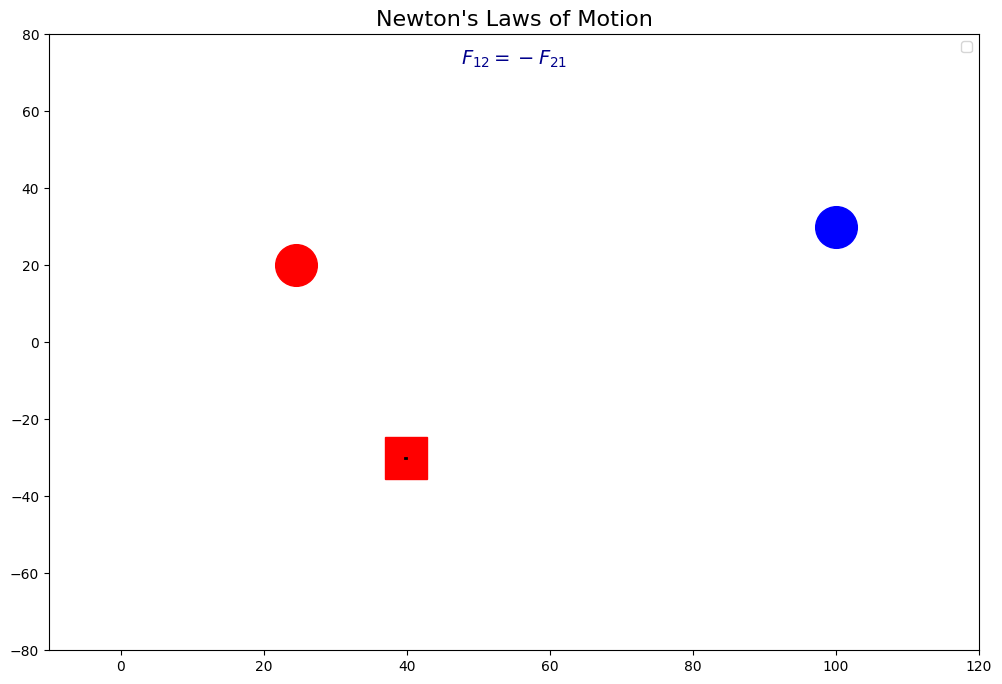

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(-10, 120)
ax.set_ylim(-80, 80)
ax.set_title("Newton's Laws of Motion", fontsize=16)

# Define plot elements for each law
doll1, = ax.plot([], [], 'bo', markersize=30)  # Blue doll for no friction
doll2, = ax.plot([], [], 'ro', markersize=30)  # Red doll for friction
doll_light, = ax.plot([], [], 'go', markersize=30)  # Green doll for light mass
doll_heavy, = ax.plot([], [], 'mo', markersize=30)  # Magenta doll for heavy mass
doll1_interact, = ax.plot([], [], 'bs', markersize=30)  # Blue square for mass 1
doll2_interact, = ax.plot([], [], 'rs', markersize=30)  # Red square for mass 2
force_vector1, = ax.plot([], [], 'k-', lw=2)  # Force vector for first law
force_vector2, = ax.plot([], [], 'k-', lw=2)  # Force vector for second law
text_display = ax.text(0.5, 0.95, "", transform=ax.transAxes, ha="center", fontsize=14, color="darkblue")
ax.legend(loc="upper right")

# Initial conditions for First Law
x1, v1 = 0, 1    # Doll with no friction
x2, v2 = 0, 1    # Doll with friction
friction = 0.02  # Deceleration rate for the friction object

# Initial conditions for Second Law
x_light, v_light, m_light = 0, 0, 1  # Light doll
x_heavy, v_heavy, m_heavy = 0, 0, 5  # Heavy doll
force = 2                            # Constant force

# Initial conditions for Third Law (Gravitational Attraction)
G = 1
m1, m2 = 10, 10
x1_grav, y1_grav = -40, -30  # Initial position of doll1
x2_grav, y2_grav = 40, -30   # Initial position of doll2

# Initialize plot elements
def init():
    doll1.set_data([], [])
    doll2.set_data([], [])
    doll_light.set_data([], [])
    doll_heavy.set_data([], [])
    doll1_interact.set_data([], [])
    doll2_interact.set_data([], [])
    force_vector1.set_data([], [])
    force_vector2.set_data([], [])
    text_display.set_text("")
    return [doll1, doll2, doll_light, doll_heavy, doll1_interact, doll2_interact, force_vector1, force_vector2, text_display]

# Update function for each frame
def update(frame):
    global x1, v1, x2, v2, x_light, v_light, x_heavy, v_heavy, x1_grav, y1_grav, x2_grav, y2_grav, force

    # Part 1: First Law Animation (Frames 1-100)
    if 1 <= frame <= 100:
        # Show Formula: F = 0
        text_display.set_text(r"$F = 0$")

        # Doll with no friction (moving in a straight line with constant velocity)
        x1 += v1
        # Doll with friction (slowing down)
        v2 -= friction
        if v2 < 0: v2 = 0
        x2 += v2

        # Update force vectors for First Law
        force_vector1.set_data([x1, x1+2], [30, 30])  # Constant velocity, no force
        force_vector2.set_data([x2, x2+1], [20, 20])  # Friction force

        # Update plot data
        doll1.set_data(x1, 30)
        doll2.set_data(x2, 20)

    # Transition to Second Law after First Law is done
    elif frame == 101:
        # Show Formula: F = ma
        text_display.set_text(r"$F = ma$")

    # Part 2: Second Law Animation (Frames 102-200)
    elif 102 <= frame <= 200:
        # Show Formula: F = ma
        text_display.set_text(r"$F = ma$")

        # Acceleration = Force / Mass
        a_light = force / m_light
        a_heavy = force / m_heavy
        # Update velocities and positions
        v_light += a_light
        v_heavy += a_heavy
        x_light += v_light
        x_heavy += v_heavy

        # Force vectors for Second Law (Proportional to acceleration)
        force_vector1.set_data([x_light, x_light+force], [10, 10])  # Light object
        force_vector2.set_data([x_heavy, x_heavy+force], [0, 0])  # Heavy object

        # Update plot data
        doll_light.set_data(x_light, 10)
        doll_heavy.set_data(x_heavy, 0)

    # Transition to Third Law after Second Law is done
    elif frame == 201:
        # No formula text for Third Law
        text_display.set_text("")

    # Part 3: Third Law (Action and Reaction) Animation (Frames 202-300)
    elif 202 <= frame <= 300:
        # Show Formula: F12 = -F21
        text_display.set_text(r"$F_{12} = -F_{21}$")

        # Calculate distance and gravitational force
        dx, dy = x2_grav - x1_grav, y2_grav - y1_grav
        distance = np.sqrt(dx**2 + dy**2)
        if distance == 0:
            return [doll1_interact, doll2_interact, force_vector1, force_vector2, text_display]  # Avoid division by zero
        # Gravitational force components
        force = G * (m1 * m2) / (distance**2)
        fx, fy = force * (dx / distance), force * (dy / distance)

        # Update positions based on mutual forces
        x1_grav += fx / m1
        y1_grav += fy / m1
        x2_grav -= fx / m2
        y2_grav -= fy / m2

        # Force vectors for Third Law (action-reaction pairs)
        force_vector1.set_data([x1_grav, x1_grav+fx], [y1_grav, y1_grav+fy])  # Force on doll1
        force_vector2.set_data([x2_grav, x2_grav-fx], [y2_grav, y2_grav-fy])  # Force on doll2

        # Update plot data
        doll1_interact.set_data(x1_grav, y1_grav)
        doll2_interact.set_data(x2_grav, y2_grav)

    # Return the list of all elements to be updated
    return [doll1, doll2, doll_light, doll_heavy, doll1_interact, doll2_interact, force_vector1, force_vector2, text_display]

# Set up animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 301), init_func=init, blit=True)

# Save the animation as a video file (MP4)
video_path = "newtons_laws_with_formulas.mp4"
writer = FFMpegWriter(fps=30, metadata=dict(artist="Newton"), bitrate=1800)
ani.save(video_path, writer=writer)

print(f"Video saved as {video_path}")
